<aside>
💡 Question-1:

Given a Binary Tree (Bt), convert it to a Doubly Linked List(DLL). The left and right pointers in nodes are to be used as previous and next pointers respectively in converted DLL. The order of nodes in DLL must be the same as in Inorder for the given Binary Tree. The first node of Inorder traversal (leftmost node in BT) must be the head node of the DLL.

Example:
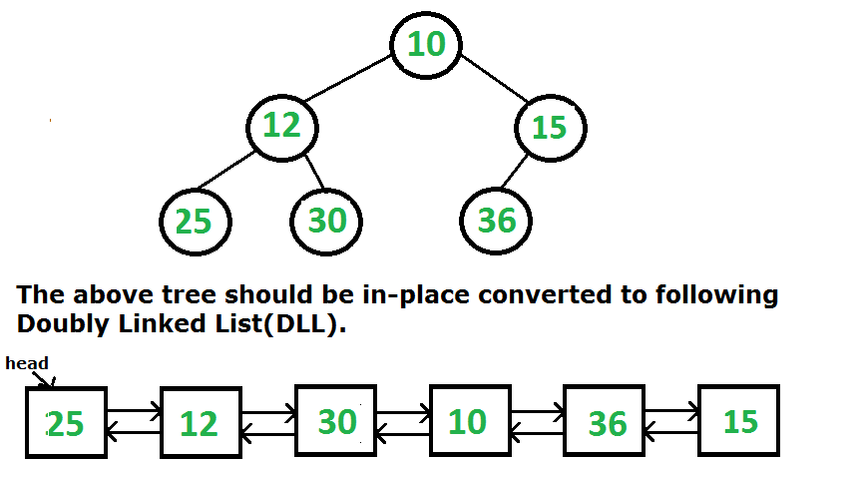
</aside>

In [1]:
# driver code
class TreeNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None


def convert_to_dll(root):
    global prev
    if root is None:
        return

    convert_to_dll(root.left)

    if prev:
        prev.right = root
        root.left = prev
    prev = root

    convert_to_dll(root.right)


def convert_bt_to_dll(root):
    global prev
    prev = None

    convert_to_dll(root)

    head = root
    while head and head.left:
        head = head.left

    return head


# Create the binary tree
root = TreeNode(10)
root.left = TreeNode(12)
root.right = TreeNode(15)
root.left.left = TreeNode(25)
root.left.right = TreeNode(30)
root.right.left = TreeNode(36)

# Convert binary tree to DLL
head = convert_bt_to_dll(root)

# Traverse the DLL and print its elements
while head:
    print(head.value, end=" ")
    head = head.right

# Output: 25 12 30 10 36 15 


25 12 30 10 36 15 

<aside>
💡 Question-2

A Given a binary tree, the task is to flip the binary tree towards the right direction that is clockwise. See the below examples to see the transformation.

In the flip operation, the leftmost node becomes the root of the flipped tree and its parent becomes its right child and the right sibling becomes its left child and the same should be done for all left most nodes recursively.

Example1:
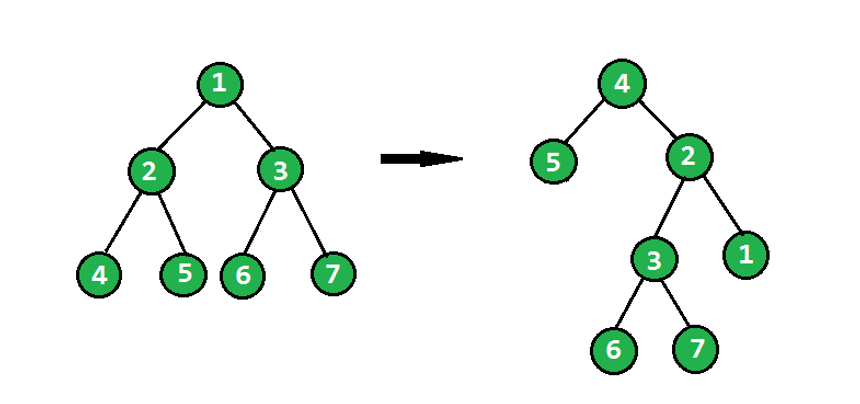
    
Example2:
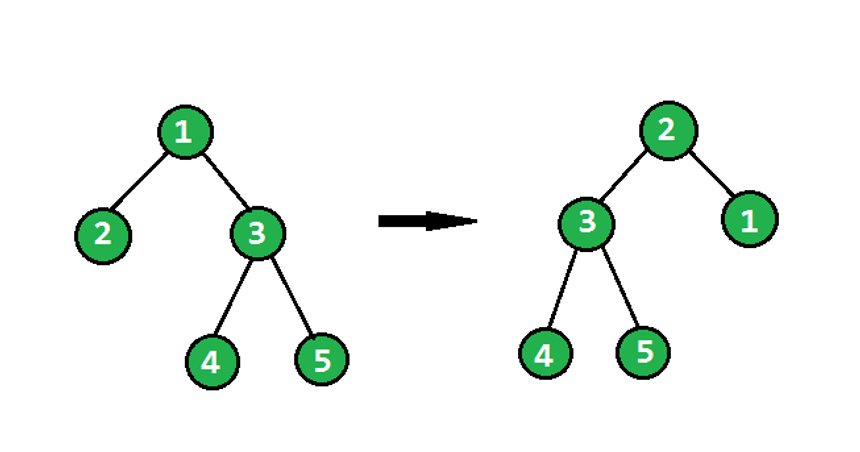
</aside>

In [2]:
# driver code
class TreeNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None


def flip_binary_tree(root):
    if root is None:
        return root

    if root.left is None and root.right is None:
        return root

    flipped_root = flip_binary_tree(root.left)

    root.left.left = root.right
    root.left.right = root
    root.left = None
    root.right = None

    return flipped_root

# driver code
# Create the binary tree
root = TreeNode(1)
root.left = TreeNode(2)
root.right = TreeNode(3)
root.left.left = TreeNode(4)
root.left.right = TreeNode(5)
root.right.left = TreeNode(6)
root.right.right = TreeNode(7)

# Flip the binary tree
flipped_root = flip_binary_tree(root)

# Print the flipped tree
def print_tree(root):
    if root is None:
        return
    print(root.value, end=" ")
    print_tree(root.left)
    print_tree(root.right)

print_tree(flipped_root)

print("")

# Output: 4 5 2 3 6 7 1 

# Create the binary tree
root = TreeNode(1)
root.left = TreeNode(2)
root.right = TreeNode(3)
root.right.left = TreeNode(4)
root.right.right = TreeNode(5)

# Flip the binary tree
flipped_root = flip_binary_tree(root)

# Print the flipped tree
def print_tree(root):
    if root is None:
        return
    print(root.value, end=" ")
    print_tree(root.left)
    print_tree(root.right)

print_tree(flipped_root)

# Output: 2 3 4 5 1 

4 5 2 3 6 7 1 
2 3 4 5 1 

<aside>
💡 Question-3:

Given a binary tree, print all its root-to-leaf paths without using recursion. For example, consider the following Binary Tree.

Input:

        6
     /    \
    3      5
  /   \     \
 2     5     4
     /   \
    7     4

Output:

There are 4 leaves, hence 4 root to leaf paths -
  6->3->2
  6->3->5->7
  6->3->5->4
  6->5>4

</aside>

In [3]:
# driver code
class TreeNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None


def print_root_to_leaf_paths(root):
    if root is None:
        return

    stack = [(root, str(root.value))]

    while stack:
        node, path = stack.pop()

        if node.left is None and node.right is None:
            print(path)
        if node.right:
            stack.append((node.right, path + "->" + str(node.right.value)))
        if node.left:
            stack.append((node.left, path + "->" + str(node.left.value)))

# driver code
# Create the binary tree
root = TreeNode(6)
root.left = TreeNode(3)
root.right = TreeNode(5)
root.left.left = TreeNode(2)
root.left.right = TreeNode(5)
root.right.left = TreeNode(4)
root.right.right = TreeNode(7)

# Print all root-to-leaf paths
print_root_to_leaf_paths(root)

# Output:
# 6->3->2
# 6->3->5->4
# 6->3->5->7


6->3->2
6->3->5
6->5->4
6->5->7


<aside>
💡 Question-4:

Given Preorder, Inorder and Postorder traversals of some tree. Write a program to check if they all are of the same tree.

**Examples:**

Input : 

        Inorder -> 4 2 5 1 3
        Preorder -> 1 2 4 5 3
        Postorder -> 4 5 2 3 1
Output : 

Yes
Explanation : 

All of the above three traversals are of
the same tree 

                           1
                         /   \
                        2     3
                      /   \
                     4     5

Input : 

        Inorder -> 4 2 5 1 3
        Preorder -> 1 5 4 2 3
        Postorder -> 4 1 2 3 5
Output : 

No

</aside>

In [4]:
# driver code
def check_traversals(inorder, preorder, postorder):
    if not inorder or not preorder or not postorder:
        return False

    # Check if the lengths of the traversals are the same
    if len(inorder) != len(preorder) or len(inorder) != len(postorder):
        return False

    # Check if the root values are the same
    if preorder[0] != postorder[-1]:
        return False

    # Check if there is only one element in the traversals
    if len(inorder) == 1:
        return True

    root = preorder[0]
    root_index = inorder.index(root)

    # Recursively check the left and right subtrees
    left_inorder = inorder[:root_index]
    right_inorder = inorder[root_index+1:]
    left_preorder = preorder[1:root_index+1]
    right_preorder = preorder[root_index+1:]
    left_postorder = postorder[:root_index]
    right_postorder = postorder[root_index:-1]

    return check_traversals(left_inorder, left_preorder, left_postorder) and \
           check_traversals(right_inorder, right_preorder, right_postorder)

# driver code
# Example usage
inorder = [4, 2, 5, 1, 3]
preorder = [1, 2, 4, 5, 3]
postorder = [4, 5, 2, 3, 1]
print(check_traversals(inorder, preorder, postorder))
# Output: True

inorder = [4, 2, 5, 1, 3]
preorder = [1, 5, 4, 2, 3]
postorder = [4, 1, 2, 3, 5]
print(check_traversals(inorder, preorder, postorder))
# Output: False


True
False
